In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
taxons = pd.read_csv('../../data/clean_taxons.csv')

NOTE: Consider way to move the top level taxon taxon_name to level1taxon if level1taxon is Nan. At the moment can't do this as would like becuase pensions is toplevel, yet also has parent = work. Think this might change in taxons data update so not going to spend time on it now.

In [3]:
content = pd.read_csv('../../data/clean_content.csv')

In [4]:
taxons = taxons[['base_path','content_id','taxon_name','level1taxon','level2taxon','level3taxon','level4taxon']]

### Hacky fix to remove the taxons that we don't want represented in training/test data

<p style="border-radius: 25px;background: #73AD21;padding: 20px;width: 300px;height: 50px;color: #FFFFFF;">MU: think I may have fixed this now...</p>

Take out all 'Imported' top taxons and World and Corporate

In [8]:
taxons.shape

(2042, 7)

In [9]:
taxons['level1taxon'] = taxons['level1taxon'].astype('str')

# Drop taxons that start with Imported (i.e. legacy taxons at the top level)

taxons = taxons[~taxons['level1taxon'].str.startswith("Imported")]
taxons = taxons[~taxons['taxon_name'].str.startswith("Imported")]

print("Taxons shape after deleting imported top taxons: {}".format(taxons.shape))

Taxons shape after deleting imported top taxons: (2042, 7)


In [10]:
taxons = taxons[taxons.level1taxon != 'World']
taxons = taxons[taxons.taxon_name != 'World']

print("Taxons shape after deleting 'World' top taxons: {}".format(taxons.shape))

Taxons shape after deleting 'World' top taxons: (2042, 7)


In [11]:
taxons = taxons[taxons.level1taxon != 'Corporate information']
taxons = taxons[taxons.taxon_name != 'Corporate information']
print("Taxons shape after deleting 'corporate information' top taxons: {}".format(taxons.shape))

Taxons shape after deleting 'corporate information' top taxons: (2041, 7)


In [44]:
# Convert nans to None

taxons['level1taxon'] = taxons['level1taxon'].where(taxons['level1taxon'] != 'nan', None)
taxons['level2taxon'] = taxons['level2taxon'].where(~taxons['level2taxon'].isnull(), None)

print("Taxons shape after converting nans to Nones: {}".format(taxons.shape))

Taxons shape after converting nans to Nones: (2041, 7)


Deal with Nans in level1taxon here but consider moving up this notebooks or moving to clean_taxons.py

In [45]:
mask = ~taxons['level1taxon'].isnull() & taxons['level2taxon'].isnull()

print("There are {} out of {} taxons where level1 should be taxon_name"
      .format(sum(taxons['level1taxon'].isnull()), taxons.shape[0]))
print("There are {} out of {} taxons with a level2"
      .format(sum(~taxons['level2taxon'].isnull()), taxons.shape[0]))
print("There are {} out of {} taxons with a level1 tag, but no level2 tag"
      .format(sum(mask), taxons.shape[0]))

There are 19 out of 2041 taxons where level1 should be taxon_name
There are 1801 out of 2041 taxons with a level2
There are 221 out of 2041 taxons with a level1 tag, but no level2 tag


In [13]:
taxons

,base_path,content_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon
0,/business/taxon,495afdb6-47be-4df1-8b38-91c8adb1eefc,Business,None,None,NaN,NaN
2,/crime-justice-and-law,ba951b09-5146-43be-87af-44075eac3ae9,"Crime, justice and law",None,None,NaN,NaN
3,/defence,e491505c-77ae-45b2-84be-8c94b94f6a2b,Defence,None,None,NaN,NaN
4,/childcare-parenting/entering-staying-uk,ba3a9702-da22-487f-86c1-8334a730e559,Entering and staying in the UK,None,None,NaN,NaN
5,/environment,3cf97f69-84de-41ae-bc7b-7e2cc238fa58,Environment,None,None,NaN,NaN
6,/going-and-being-abroad,9597c30a-605a-4e36-8bc1-47e5cdae41b3,Going and being abroad,None,None,NaN,NaN
7,/government/taxon,e48ab80a-de80-4e83-bf59-26316856a5f9,Government,None,None,NaN,NaN
8,/health-and-social-care,8124ead8-8ebc-4faf-88ad-dd5cbcc92ba8,Health and social care,None,None,NaN,NaN
9,/housing-local-and-community,4794066e-e3cc-425e-8cc4-e7ff3edb4c39,"Housing, local and community",None,None,NaN,NaN
14,/international,37d0fa26-abed-4c74-8835-b3b51ae1c8b2,International,None,None,NaN,NaN


In [14]:
content_taxons = pd.merge(
    left=content, 
    right=taxons, 
    left_on='taxon_id', 
    right_on='content_id', 
    how='outer', 
    indicator=True
)

In [15]:
assert content_taxons.shape == (338917, 23)
content_taxons.shape

(338917, 23)

In [16]:
content_taxons.head()

,Unnamed: 0,base_path_x,content_id_x,description,details,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,...,variable,taxon_id,base_path_y,content_id_y,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,4.0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,{},calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,10.0,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,{'introductory_paragraph': '<p>Use this tool t...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,78.0,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,{'introductory_paragraph': '<p>Calculate your ...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,95.0,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,{'introductory_paragraph': '<p>Calculate Statu...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,201278.0,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,{'parts': [{'slug': 'who-can-and-cant-ask-for-...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


## Tidy up columns

In [17]:
content_taxons.columns

Index(['Unnamed: 0', 'base_path_x', 'content_id_x', 'description', 'details',
       'document_type', 'first_published_at', 'locale',
       'primary_publishing_organisation', 'publishing_app', 'title', 'body',
       'combined_text', 'variable', 'taxon_id', 'base_path_y', 'content_id_y',
       'taxon_name', 'level1taxon', 'level2taxon', 'level3taxon',
       'level4taxon', '_merge'],
      dtype='object')

In [18]:
content_taxons = content_taxons.drop(['Unnamed: 0', 'variable', 'base_path_y', 
                                      'content_id_y', 'details' ], axis=1)

In [19]:
content_taxons.rename(columns={'base_path_x': 'base_path', 
                               'content_id_x': 'content_id'}, inplace=True)

## Training data: filter out rows which are duplicates, or mismatches from merge

In [21]:
print("There are {} rows in the data before filtering".
      format(content_taxons.shape[0]))
print("There are {} unique content items in the data before filtering".
      format(content_taxons.content_id.nunique()))
print("There are {} duplicates content items, both with matching content_id "
      "and taxon_id in the data before filtering"
      .format(content_taxons[content_taxons.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 338917 rows in the data before filtering
There are 125968 unique content items in the data before filtering
There are 36870 duplicates content items, both with matching content_id and taxon_id in the data before filtering


In [22]:
# Drop any rows which were not perfectly matched in taxons and content

content_taxons_filtered = content_taxons[content_taxons._merge == 'both']

print("There are {} rows in the taxon-level data after filtering out mismatches".
      format(content_taxons_filtered.shape[0]))
print("There are {} unique content items in the taxon-level data after filtering out mismatches".
      format(content_taxons_filtered.content_id.nunique()))

There are 232865 rows in the taxon-level data after filtering out mismatches
There are 114733 unique content items in the taxon-level data after filtering out mismatches


In [23]:
print("There were {} rows dropped because of mismatching"
      .format(content_taxons.shape[0] - content_taxons_filtered.shape[0]))
print("There were {} unique content items dropped because of mismatching"
      .format(content_taxons.content_id.nunique() - content_taxons_filtered.content_id.nunique()))

There were 106052 rows dropped because of mismatching
There were 11235 unique content items dropped because of mismatching


In [24]:
print("There are {} duplicates content items, both with matching"
      "content_id and taxon_id in after removing mismatches"
      .format(content_taxons_filtered[content_taxons_filtered.
                                      duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 25502 duplicates content items, both with matchingcontent_id and taxon_id in after removing mismatches


In [25]:
content_taxons_dedup = content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

In [26]:
assert content_taxons_dedup.shape == (207363, 18)
content_taxons_dedup.shape

(207363, 18)

In [43]:
content_taxons_dedup.head()

0    Business
1    Business
2    Business
3    Business
4    Business
Name: level1taxon, dtype: object

In [28]:
print("There were {} additional rows dropped due to duplicate content_id/taxon_id combination"
      .format(content_taxons_filtered.shape[0] - content_taxons_dedup.shape[0]))
print("There were {} additional content items dropped due to duplicate content_id/taxon_id combination"
      .format(content_taxons_filtered.content_id.nunique() - content_taxons_dedup.content_id.nunique()))

There were 25502 additional rows dropped due to duplicate content_id/taxon_id combination
There were 0 additional content items dropped due to duplicate content_id/taxon_id combination


## Top level taxons

Expecting 19 top taxons (plus `None`)

In [29]:
assert content_taxons_dedup.level1taxon.nunique() == 19

print("There are {} unique taxon names in the level 1 taxon"
      .format(content_taxons_dedup.level1taxon.nunique()))

set(content_taxons_dedup.level1taxon)

There are 19 unique taxon names in the level 1 taxon


{'Business',
 'Crime, justice and law',
 'Defence',
 'Education, training and skills',
 'Entering and staying in the UK',
 'Environment',
 'Going and being abroad',
 'Government',
 'Health and social care',
 'Housing, local and community',
 'International',
 'Life circumstances',
 'Money',
 None,
 "Parenting, childcare and children's services ",
 'Regional and local government',
 'Society and culture',
 'Transport',
 'Welfare',
 'Work'}

In [30]:
topfreq = content_taxons_dedup.groupby('level1taxon').size()
topfreq.sort_values(ascending=False)

level1taxon
Business                                         43530
Environment                                      21299
Government                                       21223
Health and social care                           13935
Society and culture                              13254
International                                    11440
Housing, local and community                      9929
Education, training and skills                    9128
Regional and local government                     7825
Transport                                         7759
Money                                             5672
Defence                                           3969
Crime, justice and law                            2811
Work                                              1791
Going and being abroad                            1648
Parenting, childcare and children's services      1010
Entering and staying in the UK                     293
Welfare                                            29

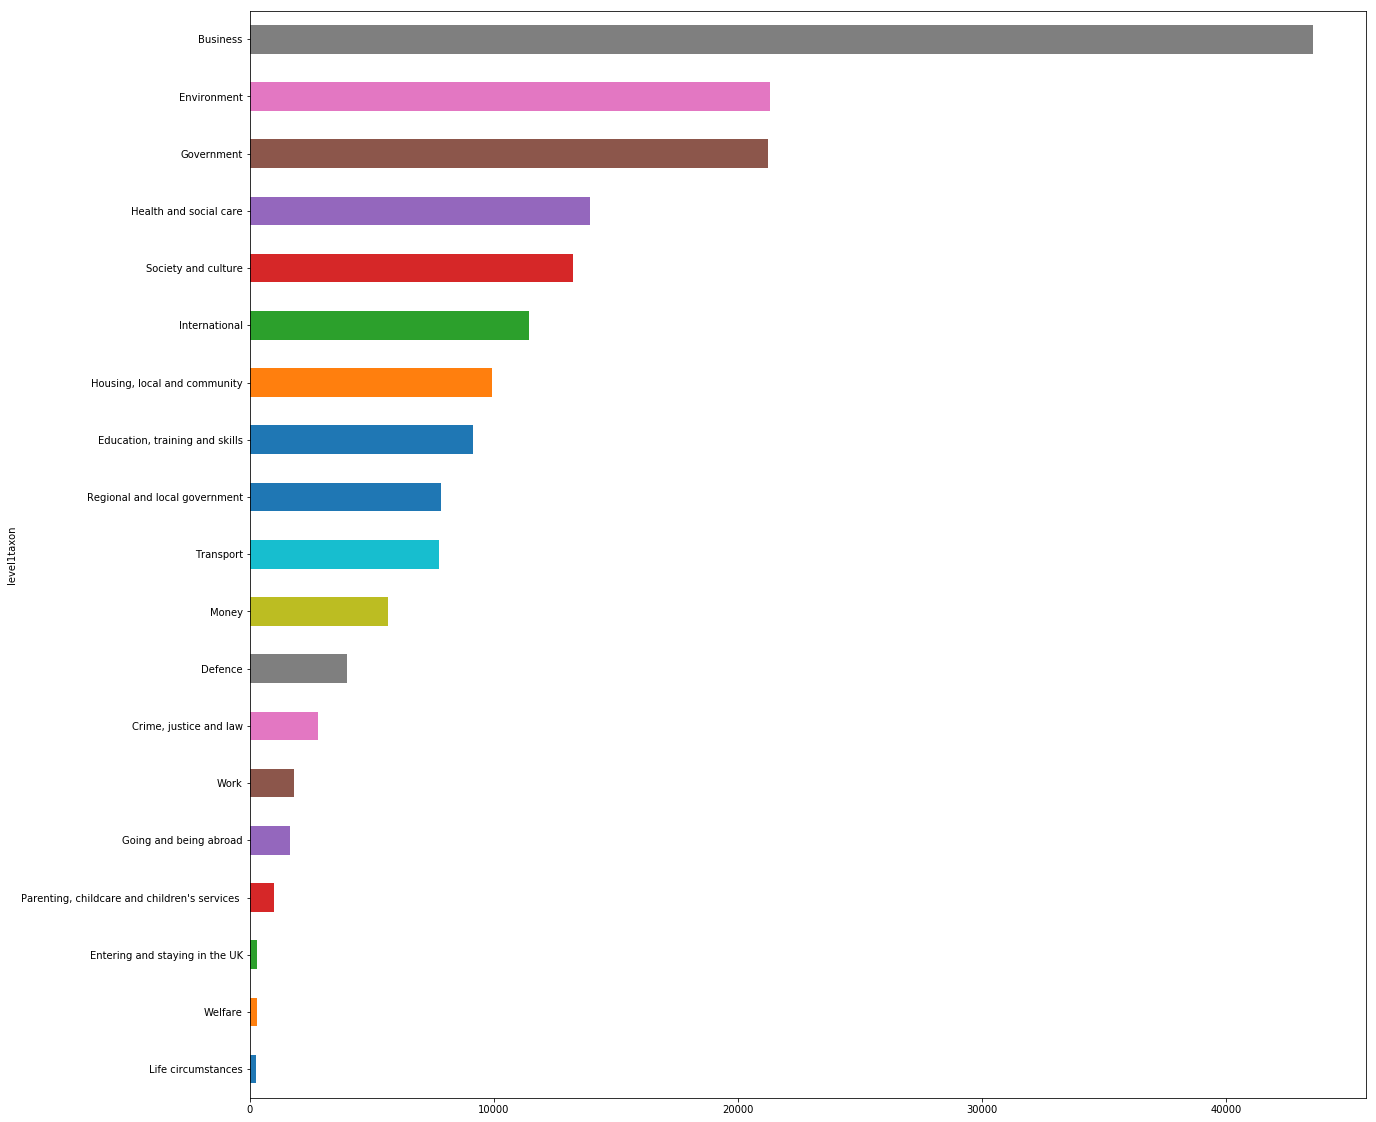

In [31]:
topfreq.sort_values().plot(kind = 'barh', figsize=(20, 20))

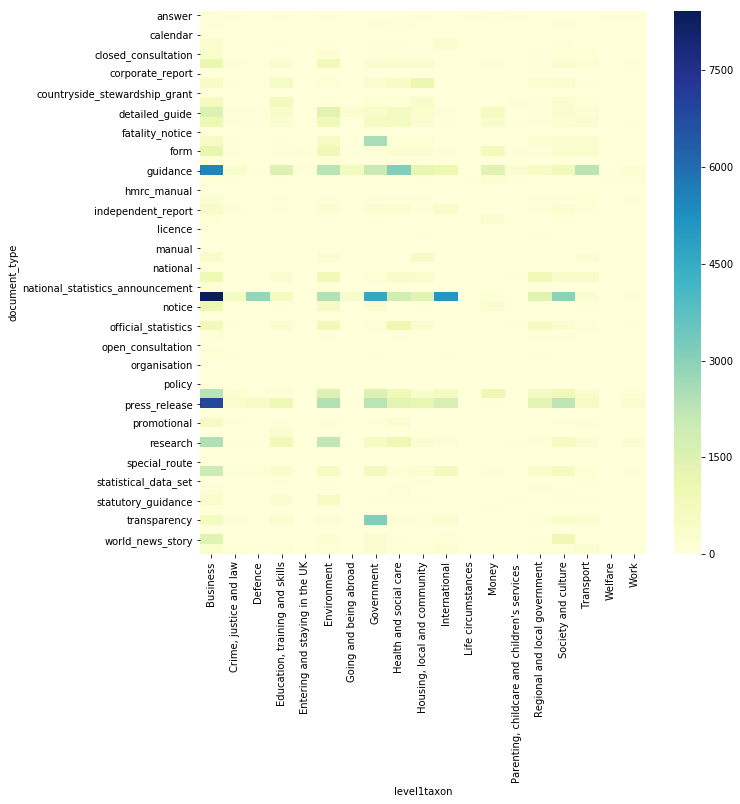

In [32]:
top_doctype = pd.crosstab(content_taxons_dedup['document_type'], content_taxons_dedup['level1taxon'])
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(top_doctype, cmap = "YlGnBu")

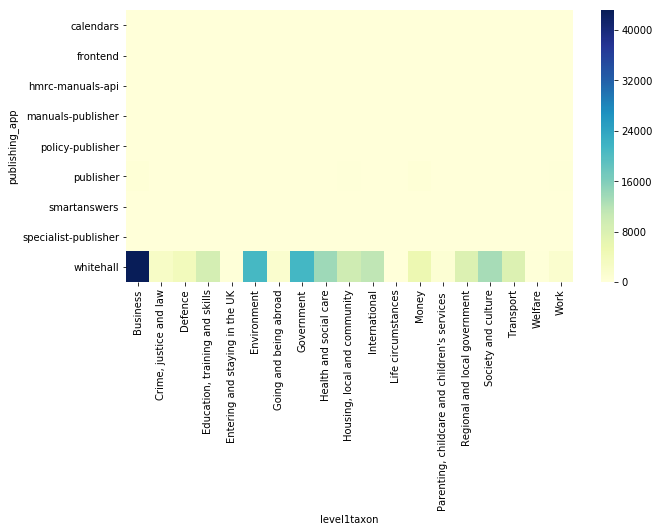

In [33]:
top_pubapp = pd.crosstab(content_taxons_dedup['publishing_app'], content_taxons_dedup['level1taxon'])
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(top_pubapp, cmap = "YlGnBu")

In [34]:
content_taxons_dedup.groupby('level1taxon').size().sort_values(ascending=False)

level1taxon
Business                                         43530
Environment                                      21299
Government                                       21223
Health and social care                           13935
Society and culture                              13254
International                                    11440
Housing, local and community                      9929
Education, training and skills                    9128
Regional and local government                     7825
Transport                                         7759
Money                                             5672
Defence                                           3969
Crime, justice and law                            2811
Work                                              1791
Going and being abroad                            1648
Parenting, childcare and children's services      1010
Entering and staying in the UK                     293
Welfare                                            29

### Level 2 taxons

In [35]:
assert content_taxons_dedup.level2taxon.nunique() == 102

print("There are {} unique taxon names in the level 2 taxon"
      .format(content_taxons_dedup.level2taxon.nunique()))

There are 102 unique taxon names in the level 2 taxon


In [36]:
second_freq = content_taxons_dedup.groupby('level2taxon').size().sort_values(ascending=False)

# Print as string to get around truncation

print(second_freq.to_string())



level2taxon
Foreign affairs                                                           4517
Climate change and energy                                                 3729
Business and enterprise                                                   3386
Trade and investment                                                      3146
Housing planning and building                                             2425
School curriculum                                                         2360
Business tax                                                              2314
International aid and development                                         2188
Housing                                                                   2004
Rail                                                                      1798
Dealing with HMRC                                                         1758
Maritime                                                                  1542
Business and the environment            

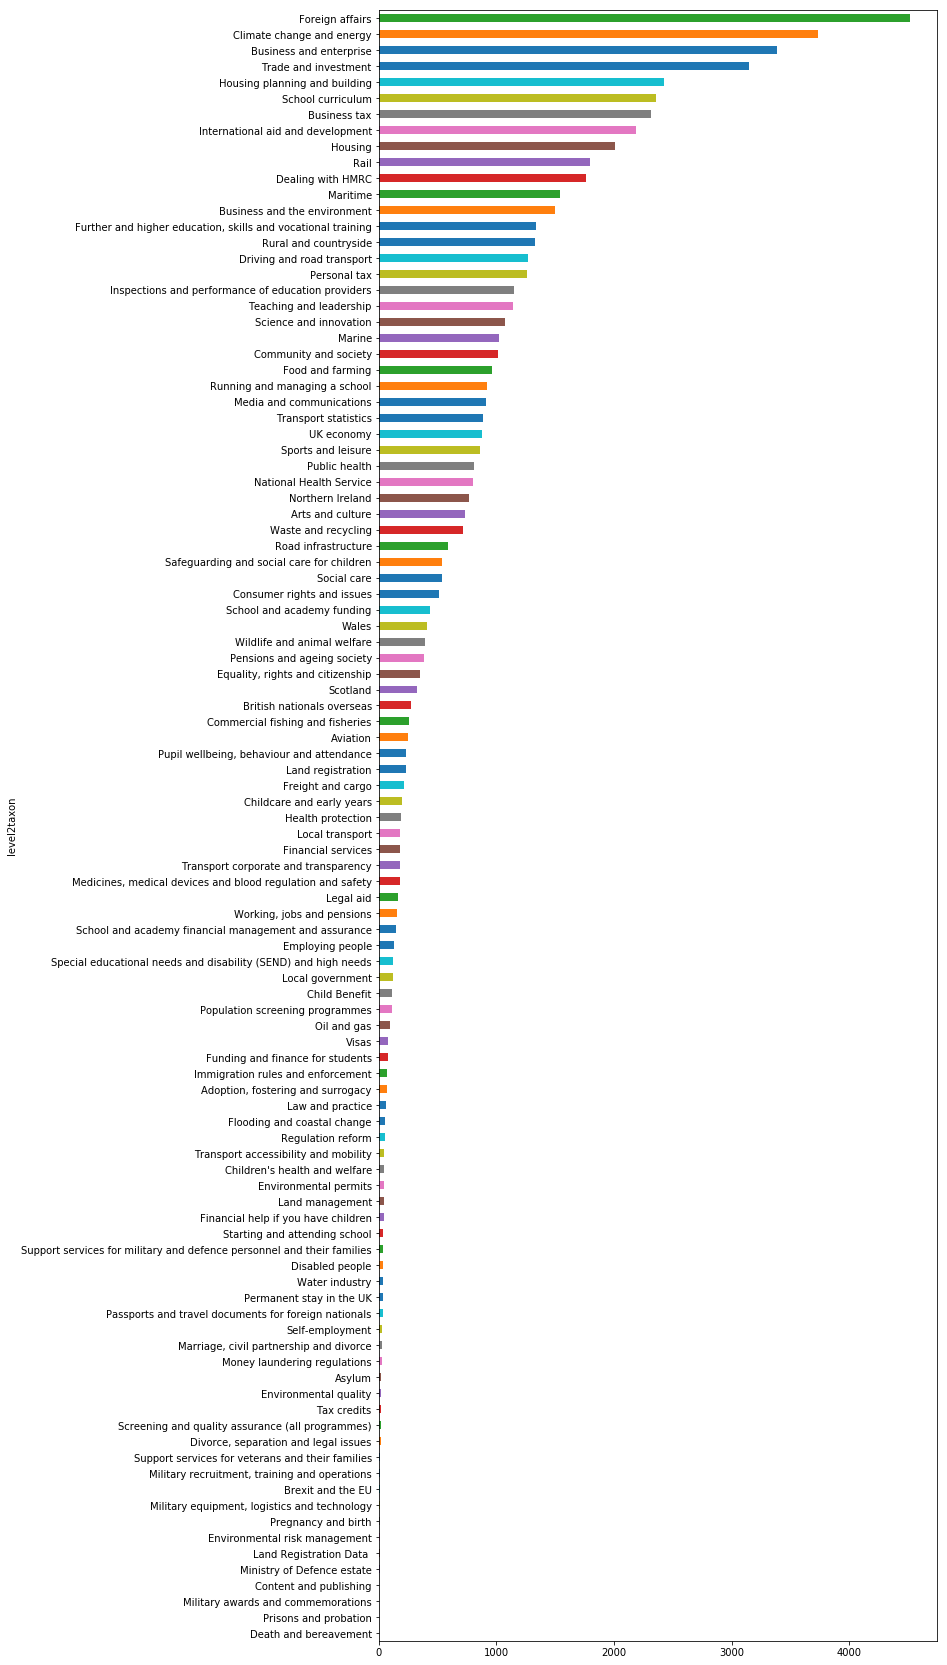

In [37]:
second_freq.sort_values().plot(kind = 'barh', figsize=(10,30))

## How much stuff is only tagged to level 1?

In [54]:
mask = ~content_taxons_dedup['level1taxon'].isnull() & content_taxons_dedup['level2taxon'].isnull()

print("There are {} out of {} content items with no level1 tag"
      .format(sum(content_taxons_dedup['level1taxon'].isnull()), content_taxons_dedup.shape[0]))
print("There are {} out of {} content items with a level2 tag"
      .format(sum(~content_taxons_dedup['level2taxon'].isnull()), content_taxons_dedup.shape[0]))
print("There are {} out of {} content items with a level1 tag, but no level2 tag"
      .format(sum(mask), content_taxons_dedup.shape[0]))

There are 0 out of 207363 content items with no level1 tag
There are 61831 out of 207363 content items with a level2 tag
There are 145532 out of 207363 content items with a level1 tag, but no level2 tag


In [41]:
content_taxons_dedup['level1taxon'].head()

0    Business
1    Business
2    Business
3    Business
4    Business
Name: level1taxon, dtype: object

<p style="border-radius: 25px;background: #73AD21;padding: 20px;width: 1000px;height: 50px;color: #FFFFFF;">Don't think this can be right as we know there are nones in level1taxon just by looking at head()??? ☝️☝️☝️☝️☝️</p>

In [56]:
# Since there are not missing level1 taxons, this does nothing, hence the warning!

content_taxons_dedup.loc[
    content_taxons_dedup['level1taxon'].isnull(), 'level1taxon'
] = content_taxons_dedup['taxon_name']



/Users/matthewupson/.pyenv/versions/3.4.6/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [57]:
mask = ~content_taxons_dedup['level1taxon'].isnull() & content_taxons_dedup['level2taxon'].isnull()

print("There are {} out of {} content items with no level1 tag"
      .format(sum(content_taxons_dedup['level1taxon'].isnull()), content_taxons_dedup.shape[0]))
print("There are {} out of {} content items with a level2 tag"
      .format(sum(~content_taxons_dedup['level2taxon'].isnull()), content_taxons_dedup.shape[0]))
print("There are {} out of {} content items with a level1 tag, but no level2 tag"
      .format(sum(mask), content_taxons_dedup.shape[0]))

There are 0 out of 207363 content items with no level1 tag
There are 61831 out of 207363 content items with a level2 tag
There are 145532 out of 207363 content items with a level1 tag, but no level2 tag


This function probably isn't needed anymore if we first convert NaNs to Nones

```
def replace_nan(level1, taxon_name):
    """
    
    :param level1: <str>
    :param taxon_name: <str>
    """
    if level1 == 'nan':
        level1 = taxon_name
    return level1
```

In [38]:

print(sum(content_taxons_dedup['level1taxon'].isnull()))
print(sum(content_taxons_dedup['level2taxon'].isnull()))
print(content_taxons_dedup.shape)

# This should no longer be needed.

#content_taxons_dedup['newcolumn'] = content_taxons_dedup.apply(lambda x: replace_nan(x['level1taxon'], x['taxon_name']), axis=1)


0
145532
(207363, 18)


In [52]:
# Not sure what you are doing here! Use pd.where if possible.

#content_taxons_dedup.loc['level1taxon'] = np.where(content_taxons_dedup['level1taxon'] == 'nan', content_taxons_dedup['taxon_name'].values, content_taxons_dedup['level1taxon'].values)

ValueError: cannot set a row with mismatched columns

In [ ]:
content_taxons_dedup.where(content_taxons_dedup['level1taxon'] == 'nan').shape

In [ ]:
, content_taxons_dedup['taxon_name'].values, content_taxons_dedup['level1taxon'].values)

In [ ]:
content_taxons_dedup['level1taxon']

## Checking that all items tagged to lower level have a label in toptaxon and secondtaxon

In [45]:
level1_2 = pd.crosstab(content_taxons_dedup['level1taxon'], content_taxons_dedup['level2taxon'])

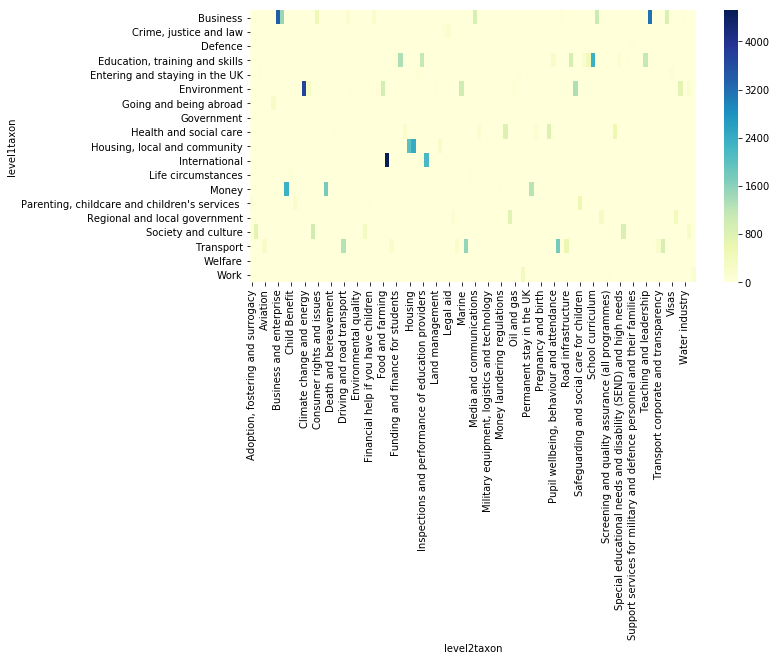

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(level1_2, cmap = "YlGnBu")